# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import json
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import datetime
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key
from api_keys import g_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(len(cities))

641


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
base_url = "http://api.openweathermap.org/data/2.5/weather?"

# Counter to go through data
record = 0
sets = 1

# Create DataFrame
weather_df = pd.DataFrame({"City": cities})

weather_df["Country"] = ""
weather_df["Date"] = ""      
weather_df["Latitude"] = ""
weather_df["Longitude"] = ""
weather_df["Cloudiness"] = ""
weather_df["Humidity"] = ""
weather_df["Max Temp"] = ""
weather_df["Wind Speed"] = ""


# Interate through Cities and retrieve data
print("Beginning Data Retrieval")
print("-----------------------------")


for index, row in weather_df.iterrows():
    
    city = row["City"]
    
    query_url = base_url + "appid=" + weather_api_key + "&q=" + city
    weather_response = requests.get(query_url).json()
 
    try:
        print(f"Processing Record {record}  of Set {sets} | {city}.")
        #print (query_url) 
        
        weather_df.loc[index, "Country"] = weather_response["sys"]["country"]     
        weather_df.loc[index, "Date"] = datetime.datetime.fromtimestamp(weather_response["dt"])
        weather_df.loc[index, "Latitude"] = weather_response["coord"]["lat"]
        weather_df.loc[index, "Longitude"] = weather_response["coord"]["lon"]
        weather_df.loc[index, "Cloudiness"] = weather_response["clouds"]["all"]
        weather_df.loc[index, "Humidity"] = weather_response["main"]["humidity"]
        weather_df.loc[index, "Max Temp (F)"] = 1.8 * (weather_response["main"]["temp_max"] - 273) + 32
        weather_df.loc[index, "Wind Speed"] = weather_response["wind"]["speed"]
               
    except:
        print(f"City not found...skipping {city}.")
        #print (query_url) 
        
    
    record = record + 1
    if record == 50:
        record = 0
        sets = sets + 1 

print("-----------------------------")        
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval
-----------------------------
Processing Record 0  of Set 1 | carballo.
Processing Record 1  of Set 1 | suhbaatar.
Processing Record 2  of Set 1 | butaritari.
Processing Record 3  of Set 1 | chuy.
Processing Record 4  of Set 1 | castro.
Processing Record 5  of Set 1 | punta arenas.
Processing Record 6  of Set 1 | new norfolk.
Processing Record 7  of Set 1 | jamestown.
Processing Record 8  of Set 1 | avarua.
Processing Record 9  of Set 1 | atar.
Processing Record 10  of Set 1 | pevek.
Processing Record 11  of Set 1 | hobart.
Processing Record 12  of Set 1 | thompson.
Processing Record 13  of Set 1 | port elizabeth.
Processing Record 14  of Set 1 | praxedis guerrero.
Processing Record 15  of Set 1 | gigmoto.
Processing Record 16  of Set 1 | bluff.
Processing Record 17  of Set 1 | dudinka.
Processing Record 18  of Set 1 | cidreira.
Processing Record 19  of Set 1 | poum.
Processing Record 20  of Set 1 | rikitea.
Processing Record 21  of Set 1 | mahebourg.
Processin

Processing Record 20  of Set 4 | jammalamadugu.
Processing Record 21  of Set 4 | amderma.
City not found...skipping amderma.
Processing Record 22  of Set 4 | kenai.
Processing Record 23  of Set 4 | bubaque.
Processing Record 24  of Set 4 | buin.
Processing Record 25  of Set 4 | torbay.
Processing Record 26  of Set 4 | grand-lahou.
Processing Record 27  of Set 4 | ambilobe.
Processing Record 28  of Set 4 | sinkat.
City not found...skipping sinkat.
Processing Record 29  of Set 4 | phenix city.
Processing Record 30  of Set 4 | morant bay.
Processing Record 31  of Set 4 | iqaluit.
Processing Record 32  of Set 4 | fairbanks.
Processing Record 33  of Set 4 | olafsvik.
Processing Record 34  of Set 4 | yabelo.
Processing Record 35  of Set 4 | puri.
Processing Record 36  of Set 4 | namatanai.
Processing Record 37  of Set 4 | divnoye.
Processing Record 38  of Set 4 | narsaq.
Processing Record 39  of Set 4 | vostok.
Processing Record 40  of Set 4 | shimoda.
Processing Record 41  of Set 4 | ouadda

Processing Record 2  of Set 8 | kavieng.
Processing Record 3  of Set 8 | jiddah.
City not found...skipping jiddah.
Processing Record 4  of Set 8 | nemuro.
Processing Record 5  of Set 8 | tabiauea.
City not found...skipping tabiauea.
Processing Record 6  of Set 8 | victoria.
Processing Record 7  of Set 8 | puerto del rosario.
Processing Record 8  of Set 8 | adrar.
Processing Record 9  of Set 8 | crixas.
Processing Record 10  of Set 8 | tumannyy.
City not found...skipping tumannyy.
Processing Record 11  of Set 8 | los llanos de aridane.
Processing Record 12  of Set 8 | ngukurr.
City not found...skipping ngukurr.
Processing Record 13  of Set 8 | fez.
Processing Record 14  of Set 8 | port hardy.
Processing Record 15  of Set 8 | antofagasta.
Processing Record 16  of Set 8 | emba.
Processing Record 17  of Set 8 | sioux lookout.
Processing Record 18  of Set 8 | kamina.
Processing Record 19  of Set 8 | chastoozerye.
City not found...skipping chastoozerye.
Processing Record 20  of Set 8 | damar

Processing Record 26  of Set 11 | dawei.
Processing Record 27  of Set 11 | zachagansk.
City not found...skipping zachagansk.
Processing Record 28  of Set 11 | udankudi.
Processing Record 29  of Set 11 | lavrentiya.
Processing Record 30  of Set 11 | smithers.
Processing Record 31  of Set 11 | djibo.
Processing Record 32  of Set 11 | payo.
Processing Record 33  of Set 11 | callaway.
Processing Record 34  of Set 11 | kavarna.
Processing Record 35  of Set 11 | katsuura.
Processing Record 36  of Set 11 | lujiang.
Processing Record 37  of Set 11 | calvini.
Processing Record 38  of Set 11 | muisne.
Processing Record 39  of Set 11 | livingston.
Processing Record 40  of Set 11 | riyadh.
Processing Record 41  of Set 11 | novoorsk.
Processing Record 42  of Set 11 | kimbe.
Processing Record 43  of Set 11 | wuwei.
Processing Record 44  of Set 11 | neufahrn.
Processing Record 45  of Set 11 | cayenne.
Processing Record 46  of Set 11 | ocosingo.
Processing Record 47  of Set 11 | halifax.
Processing Re

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# Data Count
weather_df.count()

City            641
Country         641
Date            641
Latitude        641
Longitude       641
Cloudiness      641
Humidity        641
Max Temp        641
Wind Speed      641
Max Temp (F)    585
dtype: int64

In [7]:
# Display DataFrame
weather_df.head()

,City,Country,Date,Latitude,Longitude,Cloudiness,Humidity,Max Temp,Wind Speed,Max Temp (F)
0,carballo,ES,2021-02-10 21:44:37,43.213,-8.691,100,92,,0.89,55.274
1,suhbaatar,MN,2021-02-10 21:44:37,50.2314,106.208,100,89,,1.85,16.430
2,butaritari,KI,2021-02-10 21:44:08,3.0707,172.79,100,76,,6.58,81.896
3,chuy,UY,2021-02-10 21:44:37,-33.6971,-53.4616,91,88,,4.79,69.674
4,castro,BR,2021-02-10 21:41:20,-24.7911,-50.0119,100,97,,3.63,61.610


In [9]:

# Display DataFrame
weather_df.describe()

,Max Temp (F)
count,585.000000
mean,49.264277
std,31.696218
min,-36.130000
25%,25.070000
50%,61.070000
75%,74.120000
max,97.070000


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [ ]:
#  Get the indices of cities that have humidity over 100%.
weather_df.loc[weather_df["Humidity (%)"] > 100, :]

In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_cities_df = weather_df.drop(weather_df[weather_df['Humidity'] > 100].index, inplace = False)
clean_cities_df


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

The plot proves that as we generally move away from the equator, temperature drops


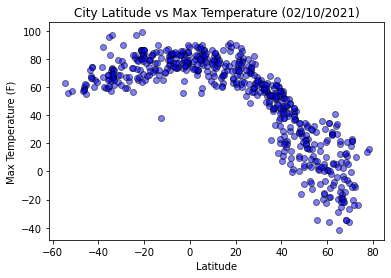

In [22]:
today = time.strftime("%m/%d/%Y")
plt.scatter(pd.to_numeric(weather_df["Latitude"]).astype(float), pd.to_numeric(weather_df["Max Temp (F)"]).astype(float), facecolors="blue", edgecolors="black", alpha = 0.5)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title(f"City Latitude vs Max Temperature ({today})")
print("The plot proves that as we generally move away from the equator, temperature drops")

## Latitude vs. Humidity Plot

The plot shows that there is no real pattern that can describe the relationship between latitude and humidity


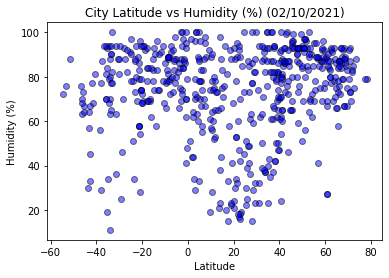

In [23]:

today = time.strftime("%m/%d/%Y")
plt.scatter(pd.to_numeric(weather_df["Latitude"]).astype(float), pd.to_numeric(weather_df["Humidity (%)"]).astype(float), facecolors="blue", edgecolors="black", alpha = 0.5)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"City Latitude vs Humidity (%) ({today})")
print("The plot shows that there is no real pattern that can describe the relationship between latitude and humidity")

## Latitude vs. Cloudiness Plot

The plot shows that there is no real pattern that can describe the relationship between latitude and cloudiness


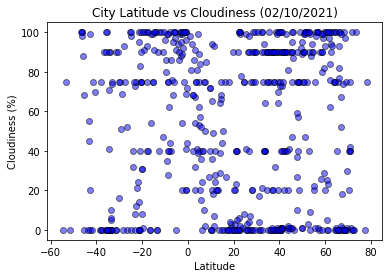

In [24]:
today = time.strftime("%m/%d/%Y")
plt.scatter(pd.to_numeric(weather_df["Latitude"]).astype(float), pd.to_numeric(weather_df["Cloudiness (%)"]).astype(float), facecolors="blue", edgecolors="black", alpha = 0.5)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"City Latitude vs Cloudiness ({today})")
print("The plot shows that there is no real pattern that can describe the relationship between latitude and cloudiness")

## Latitude vs. Wind Speed Plot

The plot shows that there is no real pattern that can describe the relationship between latitude and windspeed


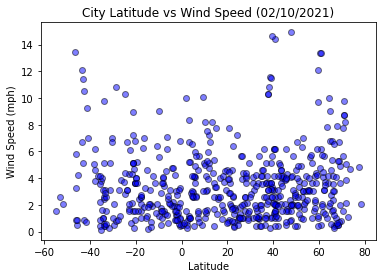

In [25]:
today = time.strftime("%m/%d/%Y")
plt.scatter(pd.to_numeric(weather_df["Latitude"]).astype(float), pd.to_numeric(weather_df["Wind Speed (mph)"]).astype(float), facecolors="blue", edgecolors="black", alpha = 0.5)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title(f"City Latitude vs Wind Speed ({today})")
print("The plot shows that there is no real pattern that can describe the relationship between latitude and windspeed")

## Linear Regression

In [26]:
# Create Northern and Southern Hemisphere DataFrames
northern_df = weather_df.loc[pd.to_numeric(weather_df["Latitude"]).astype(float) > 0, :]
southern_df = weather_df.loc[pd.to_numeric(weather_df["Latitude"]).astype(float) < 0, :]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

Regression line equation is: y = -1.44x + 95.6
The r-squared is: -0.8843910864372355
The regression displays a negative correlation.
In the nothern hemisphere, as you move away from the equator the temperature decreases.


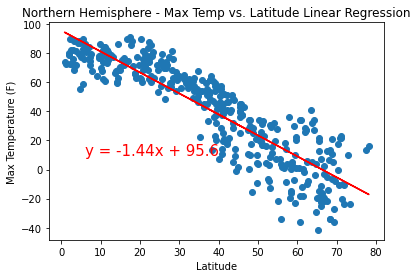

In [27]:

x_values = pd.to_numeric(northern_df['Latitude']).astype(float)
y_values = pd.to_numeric(northern_df['Max Temp (F)']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Northern Hemisphere - Max Temp vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression displays a negative correlation.")
print("In the nothern hemisphere, as you move away from the equator the temperature decreases.")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

Regression line equation is: y = 0.34x + 81.45
The r-squared is: 0.4897980819039563
The regression displays a positive correlation.
In the southern hemisphere, as you get closer to the equator the temperature increases.


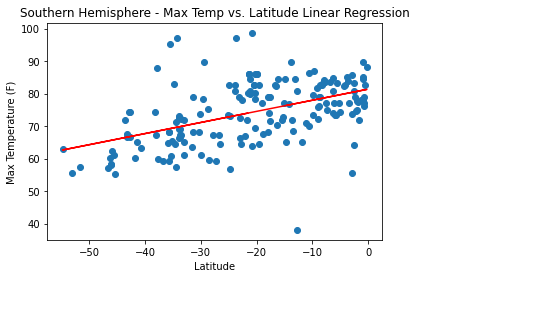

In [29]:

x_values = pd.to_numeric(southern_df['Latitude']).astype(float)
y_values = pd.to_numeric(southern_df['Max Temp (F)']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Southern Hemisphere - Max Temp vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression displays a positive correlation.")
print("In the southern hemisphere, as you get closer to the equator the temperature increases.")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Regression line equation is: y = 0.33x + 60.3
The r-squared is: 0.3112267524967788
The regression does not display much of a correlation between the data sets.


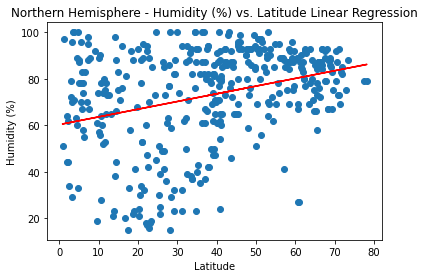

In [30]:
x_values = pd.to_numeric(northern_df['Latitude']).astype(float)
y_values = pd.to_numeric(northern_df['Humidity (%)']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression does not display much of a correlation between the data sets.") 
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Regression line equation is: y = 0.35x + 83.92
The r-squared is: 0.28914505617484465
The regression does not display much of a correlation between the data sets.


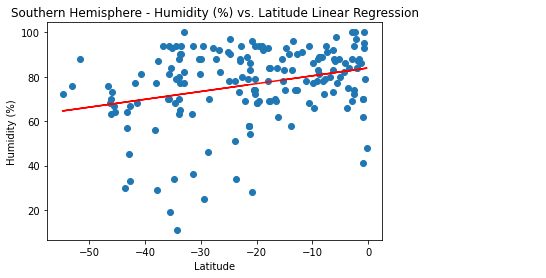

In [31]:
x_values = pd.to_numeric(southern_df['Latitude']).astype(float)
y_values = pd.to_numeric(southern_df['Humidity (%)']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression does not display much of a correlation between the data sets.")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Regression line equation is: y = 0.18x + 43.99
The r-squared is: 0.09328869858378051
The regression does not display much of a correlation between the data sets.


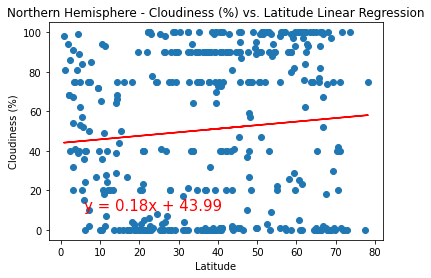

In [32]:
x_values = pd.to_numeric(northern_df['Latitude']).astype(float)
y_values = pd.to_numeric(northern_df['Cloudiness (%)']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression does not display much of a correlation between the data sets.")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Regression line equation is: y = 0.96x + 78.1
The r-squared is: 0.3423771461747367
The regression does not display much of a correlation between the data sets.


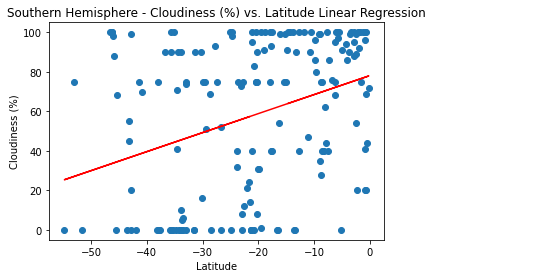

In [33]:
x_values = pd.to_numeric(southern_df['Latitude']).astype(float)
y_values = pd.to_numeric(southern_df['Cloudiness (%)']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression does not display much of a correlation between the data sets.")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Regression line equation is: y = 0.01x + 2.98
The r-squared is: 0.09017593966669712
The regression does not display much of a correlation between the data sets.


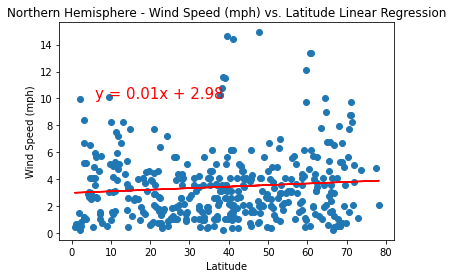

In [34]:
x_values = pd.to_numeric(northern_df['Latitude']).astype(float)
y_values = pd.to_numeric(northern_df['Wind Speed (mph)']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression does not display much of a correlation between the data sets.")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Regression line equation is: y = -0.04x + 2.31
The r-squared is: -0.23504998254240533
The regression does not display much of a correlation between the data sets.


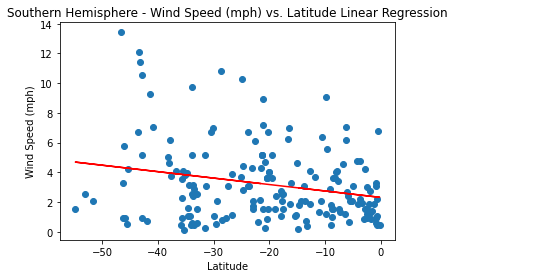

In [38]:
x_values = pd.to_numeric(southern_df['Latitude']).astype(float)
y_values = pd.to_numeric(southern_df['Wind Speed (mph)']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression does not display much of a correlation between the data sets.")
plt.show()